In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Import training data
train_df = pd.read_csv("C:/Users/peiha/Documents/GitHub/ApplyAIGroupProject/cleaned_train.csv")
train_df.head(2)

,Year_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,...,days_above_100F,days_above_110F,site_eui,x0_State_1,x0_State_10,x0_State_11,x0_State_2,x0_State_4,x0_State_6,x0_State_8
0,6,0,Multifamily_Uncategorized,76772.0,1931.0,59.0,25.0,11,34.451613,59,...,0,0,87.859290,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,6,0,Multifamily_Uncategorized,84757.0,2007.0,46.0,42.7,11,34.451613,59,...,0,0,63.924863,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
# Import test data
test_df = pd.read_csv("C:/Users/peiha/Documents/GitHub/ApplyAIGroupProject/cleaned_test.csv")
test_df.head(2)

,Year_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,...,days_above_100F,days_above_110F,site_eui,x0_State_1,x0_State_10,x0_State_11,x0_State_2,x0_State_4,x0_State_6,x0_State_8
0,3,1,Office_Uncategorized,184405.0,1917.0,72.0,15.2,11,35.080645,61,...,0,0,56.637582,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4,1,Office_Uncategorized,736974.0,1960.0,55.0,42.7,4,28.596774,58,...,0,0,106.618289,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [4]:
# Calculate correlation matrix and plot

numeric_features = train_df.select_dtypes(exclude=['object']).columns.tolist()
numeric_features.remove('site_eui')
cor_matrix = train_df[numeric_features + ['site_eui']].corr()
#cor_matrix

<AxesSubplot:>

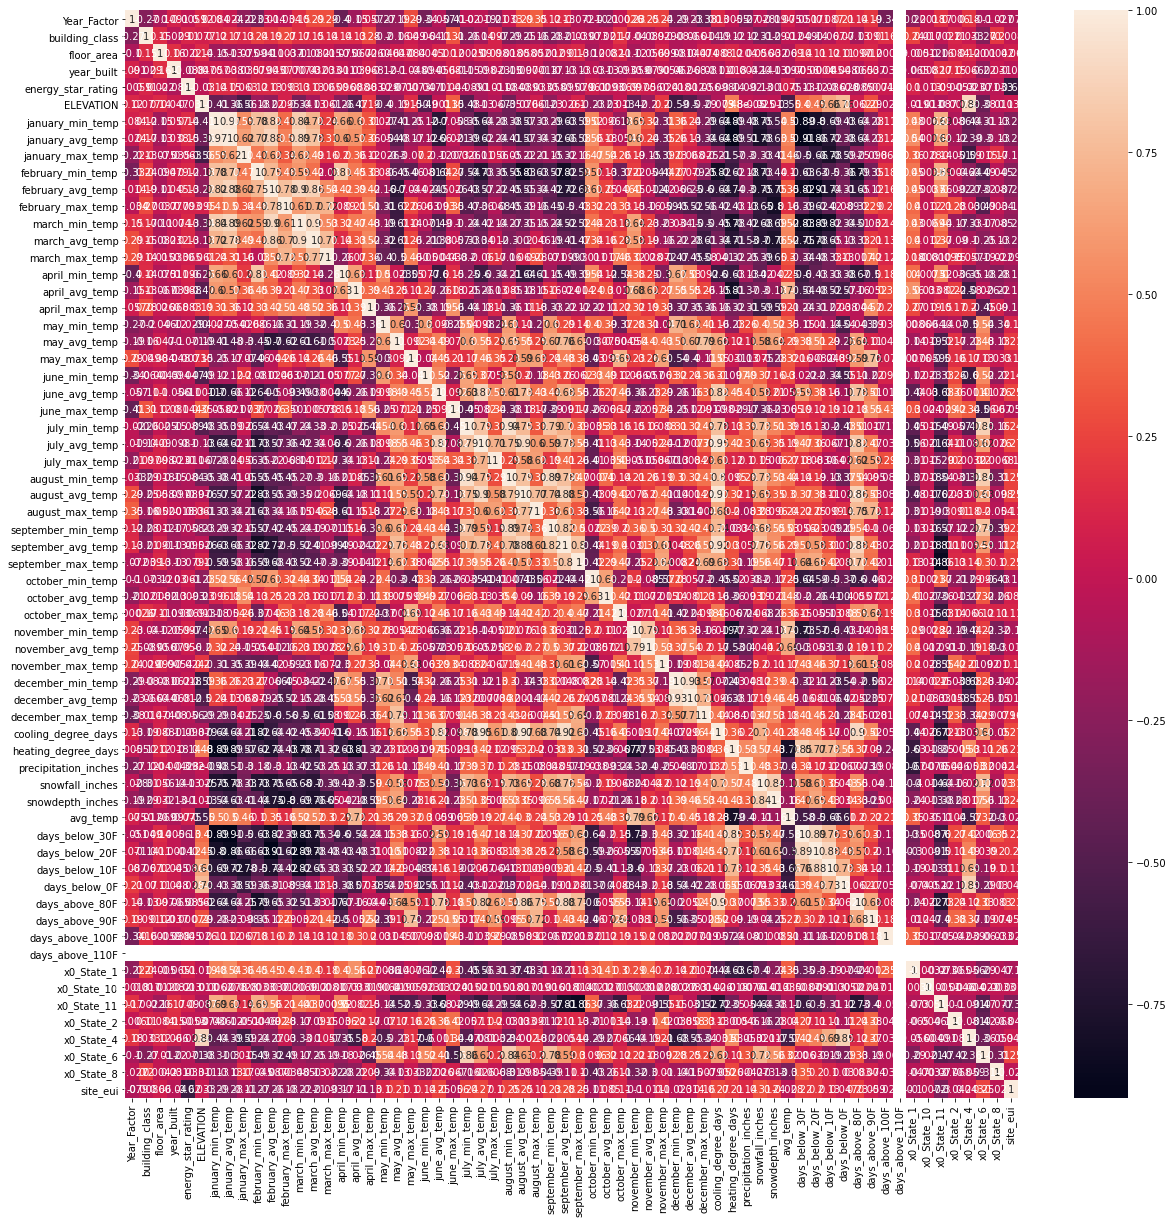

In [5]:
#plt.figure(figsize = (20,20))
#sns.heatmap(cor_matrix, annot = True)

In [6]:
cor_matrix['site_eui'].abs() > 0.2

Year_Factor           False
building_class        False
floor_area            False
year_built            False
energy_star_rating     True
                      ...  
x0_State_2            False
x0_State_4            False
x0_State_6             True
x0_State_8            False
site_eui               True
Name: site_eui, Length: 64, dtype: bool

In [7]:
features_with_higher_cor_to_target = cor_matrix['site_eui'][cor_matrix['site_eui'].abs() > 0.2].index.tolist()
features_with_higher_cor_to_target.remove('site_eui')
print("Features selected ", features_with_higher_cor_to_target)

Features selected  ['energy_star_rating', 'january_min_temp', 'january_avg_temp', 'february_min_temp', 'february_avg_temp', 'march_min_temp', 'march_avg_temp', 'may_avg_temp', 'june_avg_temp', 'july_min_temp', 'july_avg_temp', 'august_min_temp', 'august_avg_temp', 'september_min_temp', 'september_avg_temp', 'september_max_temp', 'cooling_degree_days', 'heating_degree_days', 'snowfall_inches', 'snowdepth_inches', 'days_below_30F', 'days_below_20F', 'days_above_80F', 'x0_State_11', 'x0_State_6']


In [8]:
y_train = train_df['site_eui']
X_train = train_df.drop(columns = ['site_eui','facility_type'])
# same for test data
y_test = test_df['site_eui']
X_test = test_df.drop(columns = ['site_eui','facility_type'])

In [9]:
lr_classifier = LinearRegression()
lr_classifier.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = lr_classifier.predict(X_test)
print("MSE", mean_squared_error(y_test, y_pred))

MSE 731.4467049137764


In [11]:
performance_across_n_comp = []
for n_components in range(1, len(train_df.columns) - 2):
    pca = PCA(n_components)
    pca.fit(X_train)
    X_train_transformed = pca.transform(X_train)
    X_test_transformed = pca.transform(X_test)

    lr_classifier = LinearRegression()
    lr_classifier.fit(X_train_transformed, y_train)
    y_pred_i = lr_classifier.predict(X_test_transformed)
    performance_across_n_comp.append(mean_squared_error(y_test, y_pred_i))

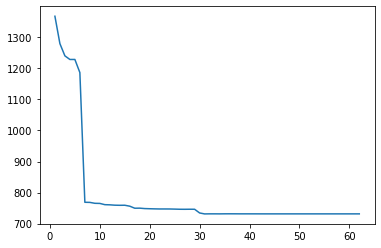

In [12]:
plt.plot(list(range(1, len(train_df.columns) - 2)), performance_across_n_comp)

In [13]:
# compare MSE of full model to PCA regression with 16 components
abs(performance_across_n_comp[15] - mean_squared_error(y_test, y_pred))

24.72454101871108

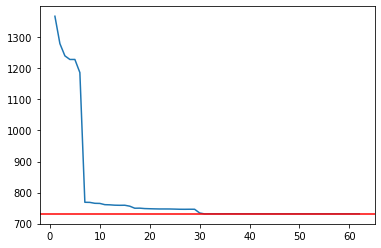

In [14]:
plt.plot(list(range(1, len(train_df.columns) - 2)), performance_across_n_comp)
plt.axhline(y=mean_squared_error(y_test, y_pred), color='r', linestyle='-')